# 1. Setup

In [42]:
import perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# 2. Testing on Wine Classification Data
For this part, we're going to test the perceptron on the default sci-kit wine data. By default, it has three classes of wines, but we'll treat class 0 as one class, and class 1 and 2 as another class. 

In [38]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

y = np.where(y == 0, 0, 1)

print(f"Features: {wine.feature_names}")

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is often important for perceptrons
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and train the perceptron
perceptron = perceptron.Perceptron(learning_rate=0.1, n_iters=1000) # Use the imported Perceptron class
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Evaluate the model's performance
accuracy = perceptron.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


The produced result is that the perceptron is easily able to classify the wines. 

# Visualising the Learning Process
In order to visualize the perceptron's process of classifying the wines, we'll pick two variables from the entire dataset and show how it changes its classification criteria over time.

In [51]:
import perceptron

# Use only two features:  "alcohol" and "malic_acid" (features 0 and 1)
X = X[:, [0, 1]]
feature_names = [wine.feature_names[0], wine.feature_names[1]] #update feature names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is often important for perceptrons
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and train the perceptron
perceptron = perceptron.Perceptron(learning_rate=0.1, n_iters=700) # Use the imported Perceptron class
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Evaluate the model's performance
accuracy = perceptron.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


The accuracy of the perceptron with only those two variables, using 1000 iterations is 0.83, which is less than what we had with all of the variables. However, this is expected, and gives us a good baseline to see how the training process happens over time.

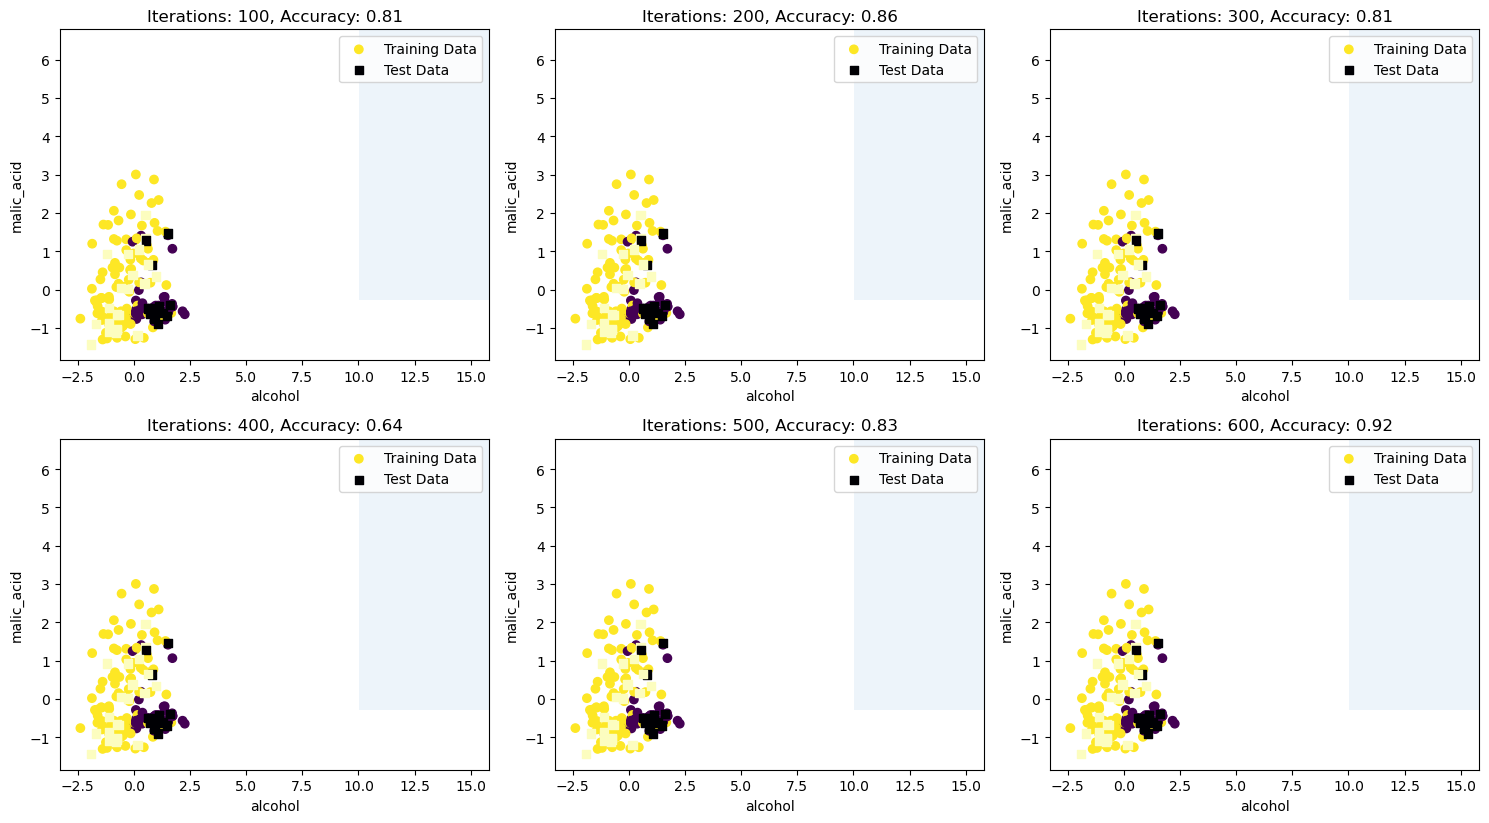

In [52]:
if X.shape[1] == 2:  # Check if we have only 2 features for easy plotting
    plt.figure(figsize=(15, 12))  # Adjust figure size for a 3x3 grid
    # Iterate through different numbers of iterations
    for i, n_iters in enumerate(range(100, 700, 100)):
        # Instantiate and train the perceptron
        import perceptron
        perceptron = perceptron.Perceptron(learning_rate=0.02, n_iters=n_iters)
        perceptron.fit(X_train, y_train)

        # Calculate the decision boundary line
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Calculate and display the accuracy for each iteration
        accuracy = perceptron.score(X_test, y_test)

        # Create a subplot for each iteration
        plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='magma', marker='s', label='Test Data')
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='Blues')
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
        plt.title(f'Iterations: {n_iters}, Accuracy: {accuracy:.2f}')
        plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
else:
    print("Data has more than 2 features, cannot visualize easily.  Skipping visualization.")


The wine data is evidently not linearly separable which is why there isn't a perfect constant increase in the accuracy every time more iterations are added to the data. 